In [16]:
import torch

In [17]:
from Proposed_ASB import Adaptive_Spectral_Block
asb = Adaptive_Spectral_Block(adaptive_filter=True, dim=3)

In [18]:
import pandas as pd
df = pd.read_csv('D:\\02.code\\LL\\第二篇\\C\\dataset\\liugongdao.csv')

In [19]:
input = torch.Tensor(df[df.columns[1:]][150:150+120].values).reshape(1,-1,3)

In [20]:
input.shape

torch.Size([1, 120, 3])

In [21]:
x_fft, freq_mask, weight_high, weight = asb(input)

torch.Size([1, 120, 3])


In [22]:
x_fft.shape

torch.Size([1, 61, 3])

In [23]:
x_fft.dtype

torch.complex64

In [24]:
x = abs(x_fft)

In [25]:
x.shape

torch.Size([1, 61, 3])

In [26]:
data = x.squeeze().detach()
data

tensor([[1.8418e+02, 3.3435e+02, 6.9059e+01],
        [2.8822e+00, 1.3890e-01, 2.9006e+00],
        [1.1232e+00, 2.2060e-02, 7.9454e-01],
        [8.1762e-01, 4.3678e-02, 1.5763e+00],
        [6.3095e-01, 3.7622e-02, 8.3021e-01],
        [5.0654e-01, 1.8936e-02, 1.9354e-01],
        [3.7970e-01, 2.0269e-02, 2.1468e-01],
        [3.4970e-01, 2.3674e-02, 1.3334e-01],
        [3.1470e-01, 1.3780e-02, 1.5175e-01],
        [2.8247e-01, 1.6518e-02, 2.9940e-01],
        [2.7296e-01, 1.1527e-02, 3.0346e-01],
        [2.2202e-01, 9.3998e-03, 6.4604e-02],
        [2.2536e-01, 1.2745e-02, 1.7413e-01],
        [2.3357e-01, 9.2122e-03, 6.4113e-02],
        [1.6374e-01, 1.5102e-02, 1.1802e-01],
        [2.1075e-01, 1.1730e-02, 1.5266e-01],
        [1.5022e-01, 1.3898e-02, 2.2522e-01],
        [1.2977e-01, 8.3010e-03, 7.4679e-02],
        [1.6221e-01, 9.7165e-03, 6.3024e-02],
        [1.1716e-01, 7.1400e-03, 3.0292e-02],
        [1.5093e-01, 9.3524e-03, 7.5407e-02],
        [1.1980e-01, 8.1415e-03, 1

In [27]:
data.shape

torch.Size([61, 3])

TypeError: min() received an invalid combination of arguments - got (axis=NoneType, out=NoneType, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out


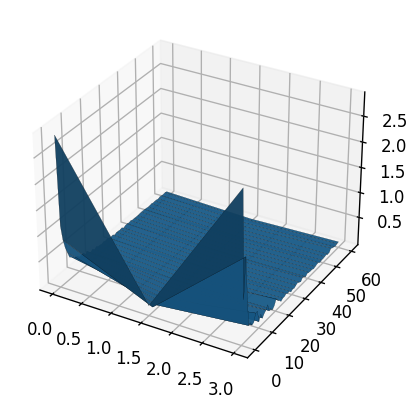

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LightSource
from scipy.ndimage import gaussian_filter
# from colormaps import parula  # 确保你已安装这个 colormaps 包

# 生成数据
x = np.linspace(0, 3, 3)  # 定义 x 轴范围和采样点
y = np.linspace(0, 60, 60)  # 定义 y 轴范围和采样点
x, y = np.meshgrid(x, y)


# 创建图形
fig = plt.figure(figsize=(6, 4), dpi=120, facecolor="w")
ax = fig.add_subplot(projection='3d')

# 绘制 3D 曲面图
surface = ax.plot_surface(
    x, y, data[1:], 
    # cmap=parula,          # 使用学术风格 colormap
    rstride=2, cstride=2, # 控制表面分辨率
    edgecolor='k',        # 添加边界线
    linewidth=0.1,        # 边界线宽度
    alpha=0.95            # 提高透明度，增加表面细节
)

# 添加等高线填充
ax.contourf(x, y, data[1:], zdir='z', offset=np.min(data[1:]) - 0.2, alpha=0.7)  # 等高线投影
ax.contour(x, y, data[1:], zdir='z', offset=np.min(data[1:]) - 0.2, colors='k', linewidths=0.5)  # 添加等高线

# 自定义轴面颜色
ax.xaxis.pane.set_color("none")
ax.yaxis.pane.set_color("none")
ax.zaxis.pane.set_color("none")

# 调整坐标轴网格
ax.xaxis._axinfo["grid"].update({"linewidth": 0.3, "color": "gray"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.3, "color": "gray"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.3, "color": "gray"})

# 设置坐标轴刻度和标签
ax.set(xlabel='X', ylabel='Y', zlabel='Z')
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 格式化 Z 轴刻度

# 调整视角
ax.view_init(elev=30, azim=240)  # 提高俯仰角，让起伏更明显

# 调整布局并保存图像
fig.tight_layout()
plt.show()


In [29]:
data

tensor([[1.8418e+02, 3.3435e+02, 6.9059e+01],
        [2.8822e+00, 1.3890e-01, 2.9006e+00],
        [1.1232e+00, 2.2060e-02, 7.9454e-01],
        [8.1762e-01, 4.3678e-02, 1.5763e+00],
        [6.3095e-01, 3.7622e-02, 8.3021e-01],
        [5.0654e-01, 1.8936e-02, 1.9354e-01],
        [3.7970e-01, 2.0269e-02, 2.1468e-01],
        [3.4970e-01, 2.3674e-02, 1.3334e-01],
        [3.1470e-01, 1.3780e-02, 1.5175e-01],
        [2.8247e-01, 1.6518e-02, 2.9940e-01],
        [2.7296e-01, 1.1527e-02, 3.0346e-01],
        [2.2202e-01, 9.3998e-03, 6.4604e-02],
        [2.2536e-01, 1.2745e-02, 1.7413e-01],
        [2.3357e-01, 9.2122e-03, 6.4113e-02],
        [1.6374e-01, 1.5102e-02, 1.1802e-01],
        [2.1075e-01, 1.1730e-02, 1.5266e-01],
        [1.5022e-01, 1.3898e-02, 2.2522e-01],
        [1.2977e-01, 8.3010e-03, 7.4679e-02],
        [1.6221e-01, 9.7165e-03, 6.3024e-02],
        [1.1716e-01, 7.1400e-03, 3.0292e-02],
        [1.5093e-01, 9.3524e-03, 7.5407e-02],
        [1.1980e-01, 8.1415e-03, 1